#  Project

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

## Your assignment

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy. Apply:

* Decision tree
* Random forest
* KNN
* Logistic Regression

The main idea behind this exercise is to get a general methodology (this could be easily used in other classification problems) to choose the best classifier once the data is cleaned and ready to use.

In [3]:
# Let's include general porpuse libraries 

import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline

## Let's begin: prepare the data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it. We use the optional paramaters in read_csv to convert missing data (indicated by a ?) into NaN.

In [4]:
df = pd.read_csv('mammographic_masses.data.txt', sep=",", header=None, na_values ='?') 
df.columns = ['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity']
df.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


The data needs to be cleaned; many rows contain missing data.

In [5]:
df.isnull().sum()

BI_RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

There are quite a few missing values in the data set. 

In [80]:
df.dtypes

BI_RADS     float64
age         float64
shape       float64
margin      float64
density     float64
severity      int64
dtype: object

Let's see if they are normaly distributed or not:

Let's start with the age, as we are not using BI_RADS      

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


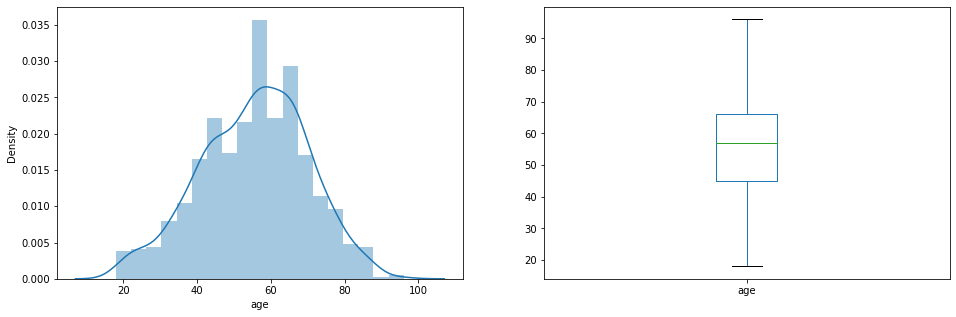

In [81]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['age']);

plt.subplot(122)
df['age'].plot.box(figsize=(16,5))
plt.show()

This follows a normal distribution, so missing values could be replaced by the mean.

The other features are categorical:

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


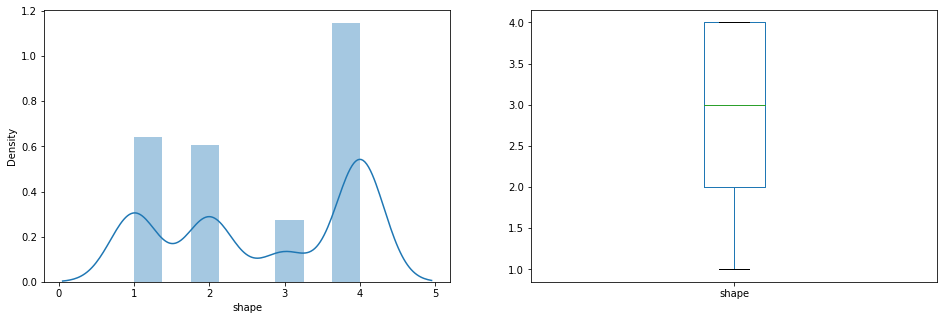

In [82]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['shape']);

plt.subplot(122)
df['shape'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:title={'center':'shape'}>

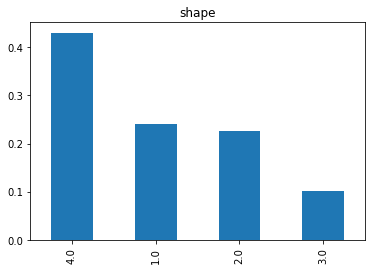

In [83]:
df['shape'].value_counts(normalize=True).plot.bar(title='shape')

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


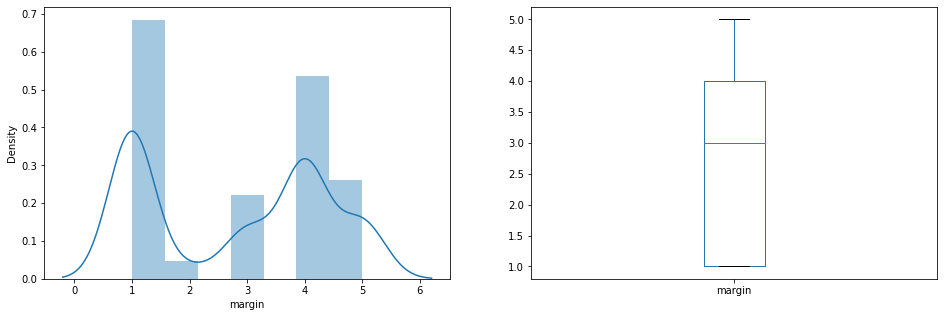

In [84]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['margin']);

plt.subplot(122)
df['margin'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:title={'center':'margin'}>

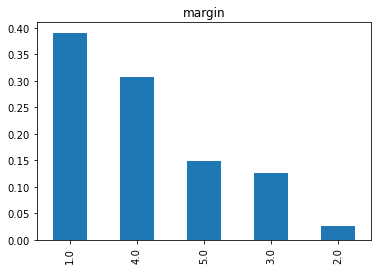

In [85]:
df['margin'].value_counts(normalize=True).plot.bar(title='margin')

C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


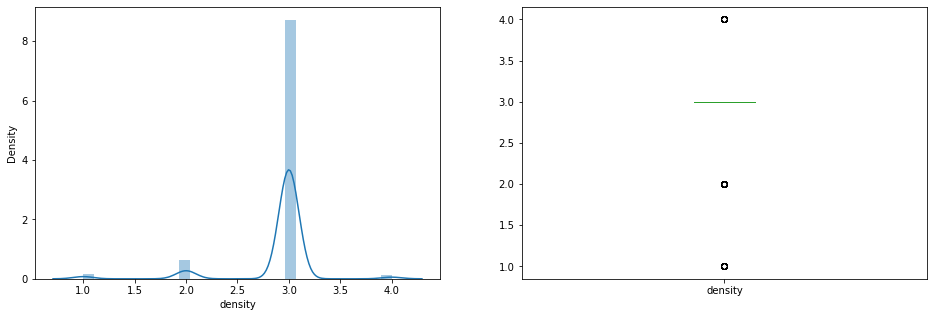

In [86]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['density']);

plt.subplot(122)
df['density'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:title={'center':'density'}>

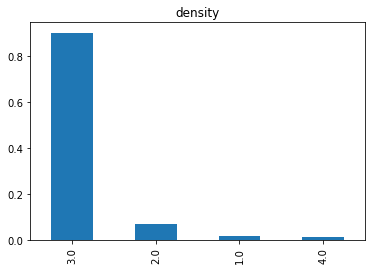

In [87]:
df['density'].value_counts(normalize=True).plot.bar(title='density')

All of them are categorical values, they could be replaced by the most frequent value. They could be also be dropped, as they represent only the 8% of the data.

In [88]:
### We do not use BI_RADS
df = df.drop(['BI_RADS'], axis=1)

## We remplace the age with the mean value
df['age'].fillna(df['age'].mean(),inplace=True)

## All the rest of categorical variables could be replaced by the most frequent
##df['shape'].fillna(df['shape'].mode()[0],inplace=True)
##df['margin'].fillna(df['margin'].mode()[0],inplace=True)
##df['density'].fillna(df['density'].mode()[0],inplace=True)
## Or drop, we do drop

df=df.dropna()


In [89]:
## lets verify if the data is clean
df.isnull().sum()

age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

Once the data is clean, lets see if we have a balanced or unbalanced class.

In [90]:
df['severity'].value_counts(normalize=True)

0    0.511962
1    0.488038
Name: severity, dtype: float64

The class is more or less balanced.

Next you'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. We create the array with the features (X) and the one with the target (y).

In [91]:
y = np.asarray(df[['severity']]).reshape(-1,1)
X = np.asarray(df.drop(['severity'], axis=1))
print('The shape of the X  is:', X.shape)
print('The shape of the y  is:', y.shape)

The shape of the X  is: (836, 4)
The shape of the y  is: (836, 1)


Some of our models require the input data to be normalized, so we normalize using an StandardScaler.

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc = StandardScaler()
X_tran = sc.fit_transform(X)
print(X_tran)

[[ 0.76822175  0.16967941  1.39344372  0.2395519 ]
 [ 0.15224032  0.97565659  1.39344372  0.2395519 ]
 [-1.90103112 -1.44227495 -1.16400732  0.2395519 ]
 ...
 [ 0.5628946   0.97565659  1.39344372  0.2395519 ]
 [ 0.69977936  0.97565659  1.39344372  0.2395519 ]
 [ 0.42600984  0.16967941  0.1147182   0.2395519 ]]


## Model selection

Let's define a general function to evaluate model scoring no matter the model, the data, the scoring variables and the number of cross validation folds:

In [123]:
from sklearn.model_selection import GridSearchCV

def model_score(X_train, y_train, model, grid_values, scorers_list, cv):
    
    ## We define two dictionaries to save the resulting scores and resulting best estimator for scorers_list
    clf_dict = {}
    clf_model_dict = {}
    
    ## We iterate with the different scoring methods defined in scorers_list
    for i, scorer in enumerate(scorers_list):
        #  Create grid search object for the model with cross validation of cv, n_jobs=-1 to consume all availaible resources, and scoring=scorer
        clf_eval = GridSearchCV(model, param_grid=grid_values, scoring=scorer, cv=cv, verbose=True, n_jobs=-1)
        # Fit this model with the train data
        clf_eval.fit(X_train,y_train)
        # Print the best parameters together with the best score for each scorer
        print('Grid best parameters for {0}: {1} scoring: {2}'
              .format(scorer, clf_eval.best_params_, round(clf_eval.best_score_,3)))
        # Save these values in a dictionary and return them, so they can be used in future processing
        clf_dict[scorer] = clf_eval.best_score_
        clf_model_dict[scorer] = clf_eval.best_estimator_
    return clf_dict, clf_model_dict

We define two different scoring methods: 
- accuracy
- roc_auc
  

In [124]:
scorers_list = ['accuracy', 'roc_auc']
## The following dictionaries will be populated with best_scores and best_estimators for each element in scorers_list and 
## model fitted with gridSearch
dict_score_results = {}
dict_best_models = {}

Before moving to model estimation, let's start by creating a single train/test split of our data. Let's set 75% for training, and 25% for testing.

In [125]:
from sklearn.model_selection import train_test_split
## A random seed is set to be able to compare results with other teams challenging the same problem
np.random.seed = 1234
## We stratify, so we have the same proportion of Severity: benign=0 or malignant=1
X_train, X_test, y_train, y_test = train_test_split(X_tran, y, test_size = 0.25, stratify=y, random_state = 1)

Now let's find the best models for X_train, y_train using our function model_score

## Decision Trees

In [126]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 1)

## We define the hiperparameters
param_grid={
"criterion":['gini','entropy'], ## Criteria to split between nodes
"max_depth":range(1,20), ## Max depth of the tree
"min_samples_split":range(1,20), ## Minimum number of samples to do a split
"min_samples_leaf":range(1,20)} ## Minimum number of samples in a final node

## We perform a cross validation with 10 folds using both accuracy and roc_auc with a DecisionTreeClassifier
scoring_result_model, best_models_model = model_score(X_train, y_train, model, param_grid, scorers_list, 10)

## We save this information in our dictionaries
dict_score_results[model.__class__.__name__] = scoring_result_model
dict_best_models[model.__class__.__name__] = best_models_model

Fitting 10 folds for each of 13718 candidates, totalling 137180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2536 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 10536 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 21736 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 36136 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 53736 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 74536 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 98536 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 125736 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 137180 out of 137180 | elapsed:  1.5min finished


Grid best parameters for accuracy: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2} scoring: 0.823
Fitting 10 folds for each of 13718 candidates, totalling 137180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 2536 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 10536 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 21736 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 36136 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 53736 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 74536 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 98536 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 125736 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 137180 out of 137180 | elapsed:  1.3min finished


Grid best parameters for roc_auc: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 19, 'min_samples_split': 2} scoring: 0.869


## Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(random_state=1, criterion= 'gini')

## We define the hiperparameters
param_grid = { 
    'n_estimators': [20, 50, 200, 500], ## Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  ## The number of features to consider when looking for the best split, log2(n_features) or sqrt(n_features)
    'max_depth' : [2,4,5,6,7,8], ## Max depth of the tree
    'class_weight':[{1: w} for w in [1, 2, 4]] ## Weight of class 1 
}

## We perform a cross validation with 10 folds using both accuracy and roc_auc with a DecisionTreeClassifier
scoring_result_model, best_models_model = model_score(X_train, y_train, model, param_grid, scorers_list, 10)

## We save this information in our dictionaries
dict_score_results[model.__class__.__name__] = scoring_result_model
dict_best_models[model.__class__.__name__] = best_models_model

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 510 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 860 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done 1310 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 1860 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.5min finished
C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Grid best parameters for accuracy: {'class_weight': {1: 2}, 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200} scoring: 0.833
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 836 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 1286 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 1836 tasks      | elapsed:  1.3min


Grid best parameters for roc_auc: {'class_weight': {1: 2}, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 20} scoring: 0.881


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.6min finished
C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


## KNN

In [128]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

## Define the hyperparametes
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 20, 30, 50, 100, 200],  # number of neighbors, usually odd numbers
             'weights': ['uniform', 'distance'], ## All points in the n_neighborhood are weighted equally (uniform) or based in distance  
             'metric': ['euclidean', 'manhattan']} ## We use euclidean or manhattan distance

## We perform a cross validation with 10 folds using both accuracy and roc_auc with a DecisionTreeClassifier
scoring_result_model, best_models_model = model_score(X_train, y_train, model, param_grid, scorers_list, 10)

## We save this information in our dictionaries
dict_score_results[model.__class__.__name__] = scoring_result_model
dict_best_models[model.__class__.__name__] = best_models_model

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Grid best parameters for accuracy: {'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'uniform'} scoring: 0.82
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid best parameters for roc_auc: {'metric': 'manhattan', 'n_neighbors': 50, 'weights': 'uniform'} scoring: 0.882


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


## Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

## Define the hyperparametes
param_grid = {'penalty' : ['l1', 'l2'],  ## These are two different ways of doing regularization, l1 is lasso regression and l2 ridge regression
     'C' : [0.1, 0.2, 0.4, 0.7, 1, 10, 100], ##  C is the inverse of the regularization
     'class_weight':[{1: w} for w in [1, 2, 4]]}  ## Weight of class 1  

## We perform a cross validation with 10 folds using both accuracy and roc_auc with a DecisionTreeClassifier
scoring_result_model, best_models_model = model_score(X_train, y_train, model, param_grid, scorers_list, 10)

## We save this information in our dictionaries
dict_score_results[model.__class__.__name__] = scoring_result_model
dict_best_models[model.__class__.__name__] = best_models_model

Fitting 10 folds for each of 42 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.2s finished
C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


Grid best parameters for accuracy: {'C': 0.4, 'class_weight': {1: 1}, 'penalty': 'l2'} scoring: 0.815
Fitting 10 folds for each of 42 candidates, totalling 420 fits
Grid best parameters for roc_auc: {'C': 0.4, 'class_weight': {1: 4}, 'penalty': 'l2'} scoring: 0.881


[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    0.2s finished
C:\Users\Francisco-Martin.NAV\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Let's put together all the scores and the different models:

### Best score for each model with gridsearch

In [146]:
pd.DataFrame(dict_score_results)

,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
accuracy,0.823093,0.832591,0.819892,0.815131
roc_auc,0.868644,0.881093,0.881607,0.881181


It seems that RandomForestClassifier gives the best result.

Once we have the best estimator for each of the models together with their corresponding score in the training set, let's check 
how these estimators perform with the test data. 

### Score in test data with cross validation

The following dataframe shows the best estimator for each pair scoring and model resulting from the previous gridsearchcv

In [156]:
models = pd.DataFrame(dict_best_models)
# models.loc[['accuracy']].values[0]
models.head()

,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
accuracy,"DecisionTreeClassifier(max_depth=6, min_sample...","(DecisionTreeClassifier(max_depth=7, max_featu...","KNeighborsClassifier(metric='manhattan', n_nei...","LogisticRegression(C=0.4, class_weight={1: 1})"
roc_auc,"DecisionTreeClassifier(criterion='entropy', ma...","(DecisionTreeClassifier(max_depth=4, max_featu...","KNeighborsClassifier(metric='manhattan', n_nei...","LogisticRegression(C=0.4, class_weight={1: 4})"


Let's define a function that will take the models corresponding to a specific score to perform a cross_val_score with the test 
data:

In [164]:
from sklearn.model_selection import cross_val_score
def cv_check(X_test,y_test, models, CV, scoring):
    
    ## This only takes the best estimators corresponding to scoring
    models  = models.loc[[scoring]].values[0]
    
    entries = []
    
    for model in models:
        model_name = model.__class__.__name__
        print ("Currently fitting: {}".format(model_name))
        results = cross_val_score(model,
                                     X_test,
                                     y_test, 
                                     scoring=scoring, cv=CV, n_jobs=-1)
        for fold_idx, result in enumerate(results):
            entries.append((model_name, fold_idx, result))
            
        ## We create a dataframe with the fold index in the crossvalidation and the corresponding scoring
        cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', scoring])
        
    return cv_df

This second function takes the output of the previous to make a scoring comparative figure between all the models. A boxplot with the scores generated in each fold of the crossvalidation is shown. 

In [168]:
def cv_bp(cv_df, scoring, axes):
    axes.grid(b=True, 
              which='both', 
              axis='both', 
              color='grey', 
              linestyle = '--', 
              linewidth = '0.3')    
    sns.boxplot(x='model_name', 
                y=scoring, 
                data=cv_df, 
                width = 0.5, 
                ax=axes).set_title('Test cross validation')
    sns.stripplot(x='model_name', 
                  y=scoring,
                  data=cv_df, 
                  size=5, jitter=True, 
                  edgecolor="grey", 
                  linewidth=1, 
                  ax=axes)
    plt.ylim(0.2,1)
    #plt.savefig('{}.png'.format(title), format='png')
    plt.show()

Currently fitting: DecisionTreeClassifier
Currently fitting: RandomForestClassifier
Currently fitting: KNeighborsClassifier
Currently fitting: LogisticRegression


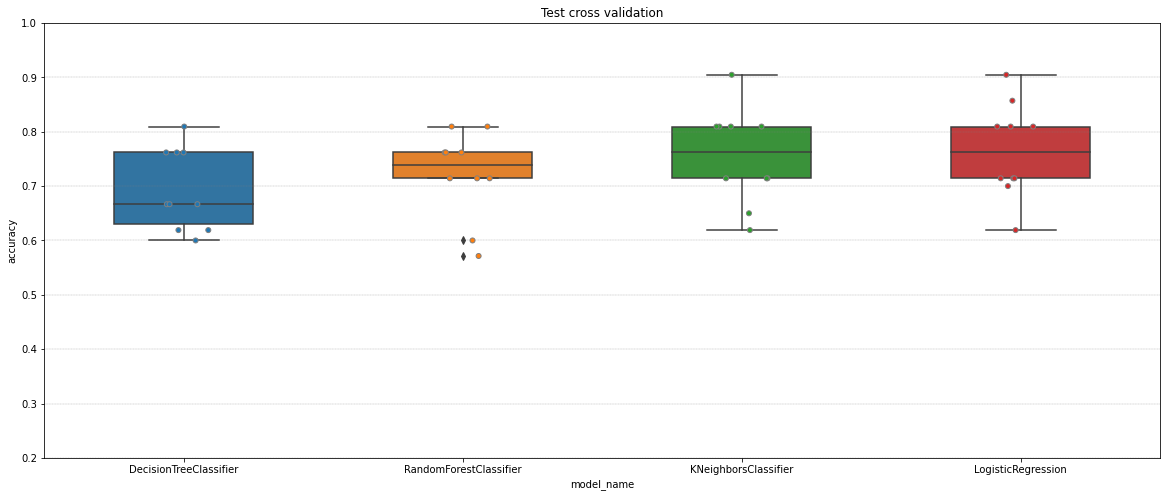

In [169]:
f, axes = plt.subplots(1,1,figsize= (20,8),squeeze=False, sharey=True)
cv_bp(cv_check(X_test,y_test, models, 10, 'accuracy'), 'accuracy', axes[0,0])

It seems that the most stable model with the highest accuracy is the LogisticRegression.

Let's also chechk how the test behaves with roc_auc as score:

Currently fitting: DecisionTreeClassifier
Currently fitting: RandomForestClassifier
Currently fitting: KNeighborsClassifier
Currently fitting: LogisticRegression


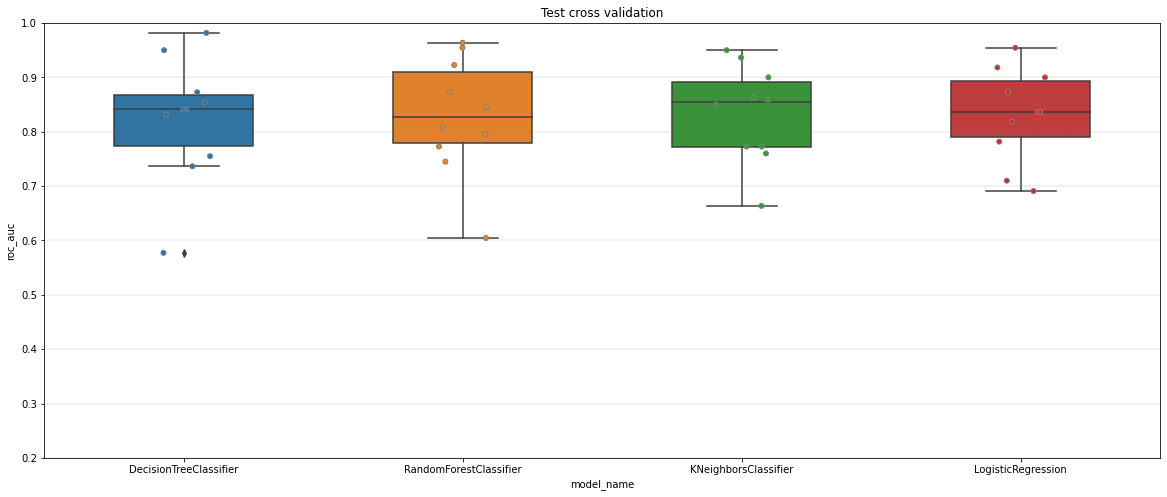

In [171]:
f, axes = plt.subplots(1,1,figsize= (20,8),squeeze=False, sharey=True)
cv_bp(cv_check(X_test,y_test, models, 10, 'roc_auc'), 'roc_auc', axes[0,0])

The same, LogisticRegression is the best for this case.

## Conclusion

The best/most stable model regarding accuracy and roc_auc is LogisticRegression.

This exercise allowed us to define a clear methodology for choosing the classifier that best performs with a given data. Functions model_score, cv_check and cv_bp could be used in any machine learning project  as they can be used with different data, models, pipeline and scoring values.